##### Fraud Detection Challange

`Problem Statement`

Create a machine learning model to detect fradulent transactions to help Xente provide improved and safer services to its customers. 

`Approach`

- Understand how financial transactions works
- Explore how fraud occurs in this space
- Get past data showing transactions and whether or not it was fraudulent or not
- Apply several classification algorithms to build out a ML model that can accurately predict a fradualent transaction
- Select a model whose F1 evaluation score is the highest.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

C:\Users\aaginam\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
train_df = pd.read_csv('datasets/training.csv')
test_df = pd.read_csv('datasets/test.csv')

##### Data Understanding

`TransactionId`:  Unique transaction identifier on platform

`BatchId` : Unique number assigned to a batch of transactions for processing

`AccountId` : Unique number identifying the customer on platform

`SubscriptionId`  : Unique number identifying the customer subscription

`CustomerId` : Unique identifier attached to Account

`CurrencyCode` : Country currency

`CountryCode` : Numerical geographical code of country

`ProviderId`: Source provider of Items bought.

`ProductId` : Item name being bought.

`ProductCategory` : ProductIds are organized into these broader product categories.

`ChannelId` : "Identifies if customer used web,Android, IOS, pay later or checkout."

`Amount` : Value of the transaction. Positive for debits from customer account and negative for credit into customer account

`Value`: Absolute value of the amount

`TransactionStartTime` : Transaction start time

`PricingStrategy` : Category of Xente's pricing structure for merchants

`FraudResult` : Fraud status of transaction 1 -yes or 0-No


#### Data Profiling

In [4]:
train_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [5]:
test_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:01:40Z,4
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13T10:02:12Z,2
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:02:30Z,2
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13T10:02:38Z,4
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:02:58Z,2


Train_df contains the variable FraudResult while test_df doesn't. This implies that FraudResult is the variable we want to predict. 

In [6]:
# create a copy of train and test df

train_df_copy = train_df.copy()
test_df_copy = test_df.copy()

In [7]:
 train_df.shape

(95662, 16)

In [8]:
test_df.shape

(45019, 15)

##### train_df is ~ 2x test_df

In [9]:
## to make cleaning and transformation easier, let's combine train and test data

#Add a column to distinguish between train and test data

train_df['dataset'] = 'train'
test_df['dataset'] = 'test'

In [10]:
# Ensure the train and test data have the same columns:
    
if 'FraudResult' in train_df.columns and 'FraudResult' not in test_df.columns:
    test_df['FraudResult'] = None 

In [11]:
train_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,dataset
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0,train
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0,train
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0,train
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0,train
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0,train


In [12]:
test_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,dataset,FraudResult
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:01:40Z,4,test,None
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13T10:02:12Z,2,test,None
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:02:30Z,2,test,None
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13T10:02:38Z,4,test,None
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:02:58Z,2,test,None


In [13]:
combined_df = pd.concat([train_df, test_df], ignore_index=True)

In [14]:
combined_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,dataset
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0,train
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0,train
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0,train
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0,train
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0,train


In [15]:
combined_df.tail()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,dataset
140676,TransactionId_116198,BatchId_117348,AccountId_4841,SubscriptionId_3829,CustomerId_5225,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_3,-5000.0,5000,2019-03-14T23:56:28Z,2,None,test
140677,TransactionId_24829,BatchId_53630,AccountId_4803,SubscriptionId_1738,CustomerId_5272,UGX,256,ProviderId_3,ProductId_10,airtime,ChannelId_3,10000.0,10000,2019-03-14T23:57:38Z,1,None,test
140678,TransactionId_102920,BatchId_112209,AccountId_4817,SubscriptionId_4613,CustomerId_5286,UGX,256,ProviderId_3,ProductId_10,airtime,ChannelId_3,10000.0,10000,2019-03-14T23:59:17Z,1,None,test
140679,TransactionId_128439,BatchId_58734,AccountId_4841,SubscriptionId_3829,CustomerId_5286,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_3,-5000.0,5000,2019-03-14T23:59:39Z,2,None,test
140680,TransactionId_45927,BatchId_98308,AccountId_4593,SubscriptionId_3866,CustomerId_5057,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,3500.0,3500,2019-03-14T23:59:51Z,4,None,test


In [16]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140681 entries, 0 to 140680
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   TransactionId         140681 non-null  object 
 1   BatchId               140681 non-null  object 
 2   AccountId             140681 non-null  object 
 3   SubscriptionId        140681 non-null  object 
 4   CustomerId            140681 non-null  object 
 5   CurrencyCode          140681 non-null  object 
 6   CountryCode           140681 non-null  int64  
 7   ProviderId            140681 non-null  object 
 8   ProductId             140681 non-null  object 
 9   ProductCategory       140681 non-null  object 
 10  ChannelId             140681 non-null  object 
 11  Amount                140681 non-null  float64
 12  Value                 140681 non-null  int64  
 13  TransactionStartTime  140681 non-null  object 
 14  PricingStrategy       140681 non-null  int64  
 15  

#### Data cleaning / transformation

In [17]:
combined_df.isnull().sum()

TransactionId               0
BatchId                     0
AccountId                   0
SubscriptionId              0
CustomerId                  0
CurrencyCode                0
CountryCode                 0
ProviderId                  0
ProductId                   0
ProductCategory             0
ChannelId                   0
Amount                      0
Value                       0
TransactionStartTime        0
PricingStrategy             0
FraudResult             45019
dataset                     0
dtype: int64

In [18]:
combined_df.duplicated().sum()

0

In [19]:
combined_df.describe()

,CountryCode,Amount,Value,PricingStrategy
count,140681.0,1.406810e+05,1.406810e+05,140681.000000
mean,256.0,6.050578e+03,1.002851e+04,2.257469
std,0.0,1.153134e+05,1.150626e+05,0.735089
min,256.0,-2.500000e+06,2.000000e+00,0.000000
25%,256.0,-5.000000e+01,3.920000e+02,2.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000
75%,256.0,3.000000e+03,5.000000e+03,2.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000


- The maximum amount credited is 2.5 million shilling while the max amount debited is 9.8 million shilling.

We need to create a new column that indicates debit or credit

In [20]:
# combined_df['Transaction type'] = 'debit'

combined_df['Transaction type'] = combined_df['Amount'].apply(lambda x: 'credit' if x < 0 else 'debit')

In [21]:
combined_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,dataset,Transaction type
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0,train,debit
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0,train,credit
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0,train,debit
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0,train,debit
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0,train,credit


In [22]:
train_df['FraudResult'].value_counts()

FraudResult
0    95469
1      193
Name: count, dtype: int64

##### There's a high data imbalance. We have more examples of non-fraudulent transactions. We would need to ensure our model can gracefully handle this

In [23]:
cat_columns = [i for i in combined_df.select_dtypes(include=['object']).columns]

In [24]:
num_columns = [i for i in combined_df.select_dtypes(include=['int64', 'float64']).columns]

In [25]:
cat_columns

['TransactionId',
 'BatchId',
 'AccountId',
 'SubscriptionId',
 'CustomerId',
 'CurrencyCode',
 'ProviderId',
 'ProductId',
 'ProductCategory',
 'ChannelId',
 'TransactionStartTime',
 'FraudResult',
 'dataset',
 'Transaction type']

In [26]:
num_columns

['CountryCode', 'Amount', 'Value', 'PricingStrategy']

In [27]:
for col in cat_columns:
    print(f'Value count {col}')
    print(combined_df[col].value_counts())
    print('----------------')

Value count TransactionId
TransactionId
TransactionId_76871     1
TransactionId_120848    1
TransactionId_121424    1
TransactionId_60107     1
TransactionId_120702    1
                       ..
TransactionId_60998     1
TransactionId_93432     1
TransactionId_17517     1
TransactionId_30753     1
TransactionId_45927     1
Name: count, Length: 140681, dtype: int64
----------------
Value count BatchId
BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
                  ..
BatchId_62059      1
BatchId_103685     1
BatchId_66437      1
BatchId_54076      1
BatchId_98308      1
Name: count, Length: 139493, dtype: int64
----------------
Value count AccountId
AccountId
AccountId_4841    42334
AccountId_4840     5500
AccountId_4249     4592
AccountId_799      1961
AccountId_10       1315
                  ...  
AccountId_1665        1
AccountId_2415        1
AccountId_2275        1
AccountId_237         1
AccountId_804         1
N

Transaction ID is unique indication it is an identifier for each record. Columns like transaction ID, batch ID , Account ID, Customer ID and Subscription ID are identifiers that reference other entities and would definitely not impact fraudulent transactions, so we drop them

In [28]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140681 entries, 0 to 140680
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   TransactionId         140681 non-null  object 
 1   BatchId               140681 non-null  object 
 2   AccountId             140681 non-null  object 
 3   SubscriptionId        140681 non-null  object 
 4   CustomerId            140681 non-null  object 
 5   CurrencyCode          140681 non-null  object 
 6   CountryCode           140681 non-null  int64  
 7   ProviderId            140681 non-null  object 
 8   ProductId             140681 non-null  object 
 9   ProductCategory       140681 non-null  object 
 10  ChannelId             140681 non-null  object 
 11  Amount                140681 non-null  float64
 12  Value                 140681 non-null  int64  
 13  TransactionStartTime  140681 non-null  object 
 14  PricingStrategy       140681 non-null  int64  
 15  

In [29]:
combined_df.drop(['TransactionId','BatchId', 'AccountId', 'SubscriptionId', 'CustomerId'], axis=1, inplace=True)

 we should also drop transaction start time as it would not be sensible to build a model to predict fradualent transaction and it depends on time. There's just a single currency code so we can drop that as well.

In [30]:
combined_df.drop(['TransactionStartTime', 'CurrencyCode'], axis=1, inplace=True)

In [31]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140681 entries, 0 to 140680
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CountryCode       140681 non-null  int64  
 1   ProviderId        140681 non-null  object 
 2   ProductId         140681 non-null  object 
 3   ProductCategory   140681 non-null  object 
 4   ChannelId         140681 non-null  object 
 5   Amount            140681 non-null  float64
 6   Value             140681 non-null  int64  
 7   PricingStrategy   140681 non-null  int64  
 8   FraudResult       95662 non-null   object 
 9   dataset           140681 non-null  object 
 10  Transaction type  140681 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.8+ MB


In [32]:
combined_df.head()

,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,dataset,Transaction type
0,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2,0,train,debit
1,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2,0,train,credit
2,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2,0,train,debit
3,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2,0,train,debit
4,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2,0,train,credit


In [33]:
combined_df[num_columns].describe()

,CountryCode,Amount,Value,PricingStrategy
count,140681.0,1.406810e+05,1.406810e+05,140681.000000
mean,256.0,6.050578e+03,1.002851e+04,2.257469
std,0.0,1.153134e+05,1.150626e+05,0.735089
min,256.0,-2.500000e+06,2.000000e+00,0.000000
25%,256.0,-5.000000e+01,3.920000e+02,2.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000
75%,256.0,3.000000e+03,5.000000e+03,2.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000


Country code is the same across all records so we should drop it. The other numerical columns have a similar scale i.e std is similar.

In [34]:
combined_df.drop('CountryCode', axis=1, inplace=True)

In [35]:
combined_df.head()

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,dataset,Transaction type
0,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2,0,train,debit
1,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2,0,train,credit
2,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2,0,train,debit
3,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2,0,train,debit
4,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2,0,train,credit


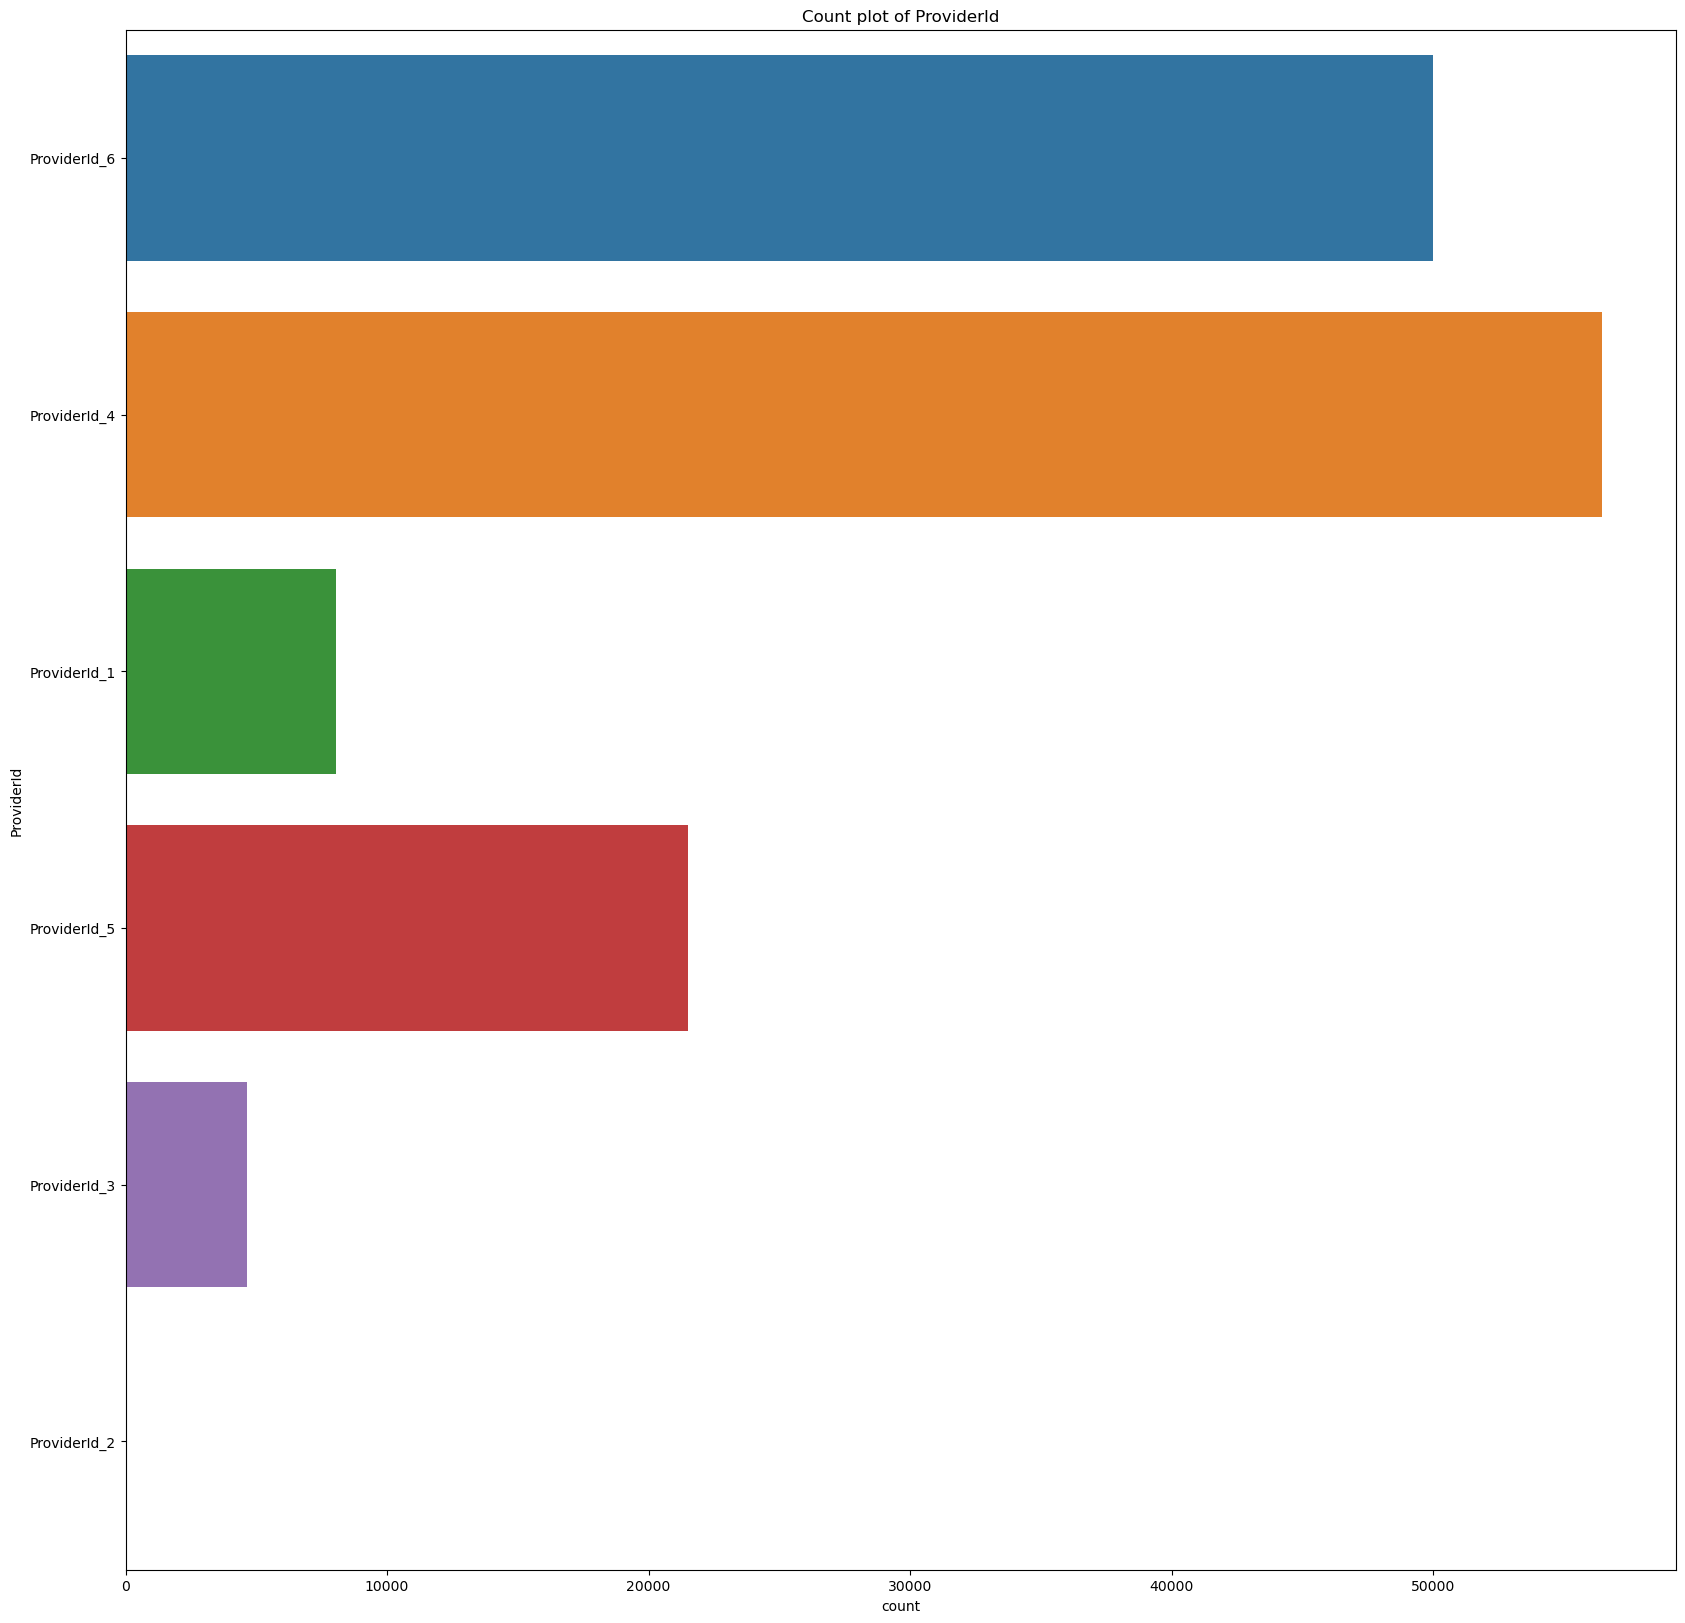

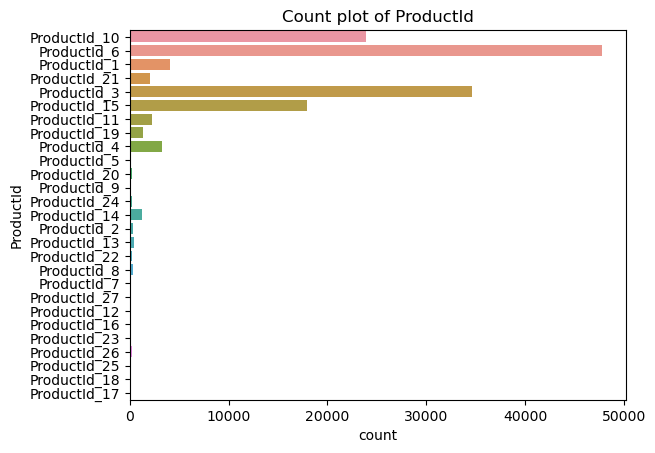

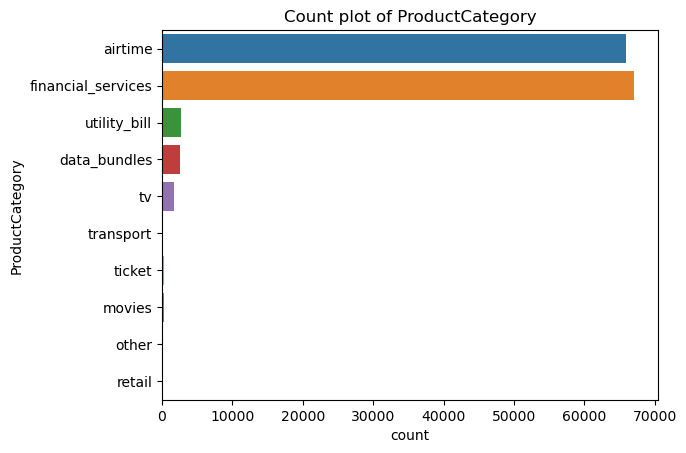

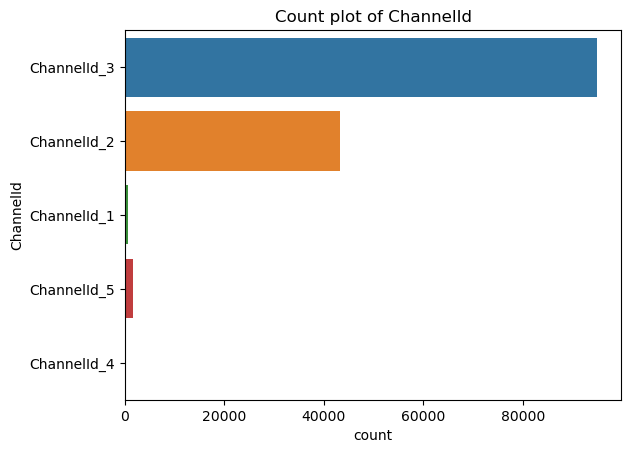

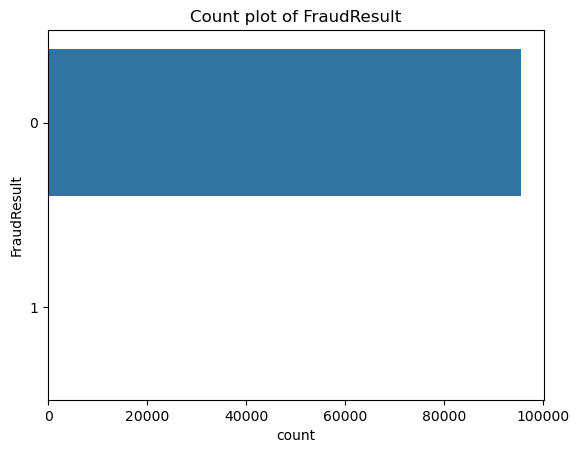

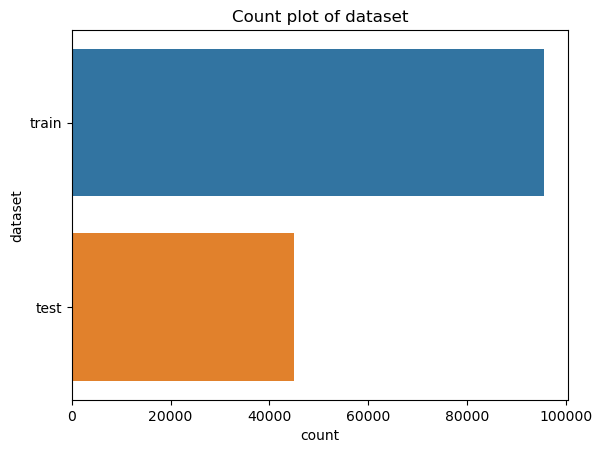

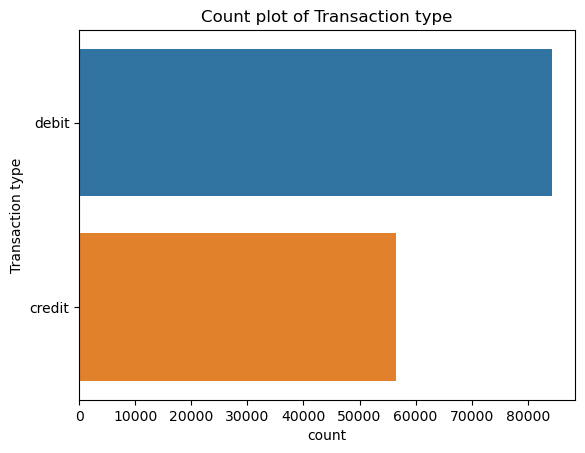

In [36]:
## Let's visualize the categories in the categorical columns

import seaborn as sb
plt.figure(figsize=(20,20))


cat_columns = [i for i in combined_df.select_dtypes(include=['object']).columns]

for col in cat_columns:
    sb.countplot(y=col, data=combined_df)
    plt.title(f'Count plot of {col}')
    plt.show()

#### Feature Selection

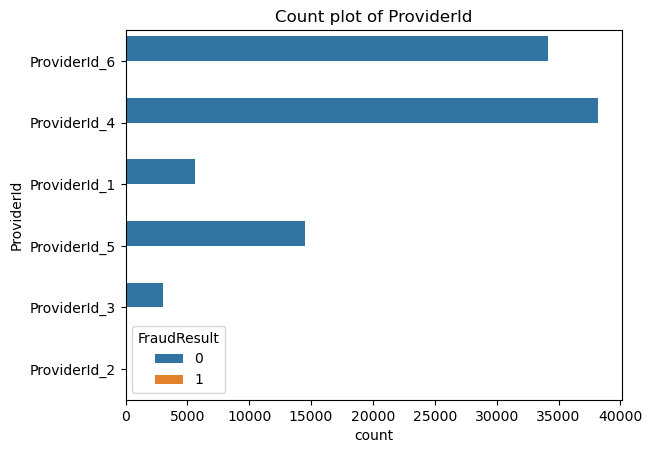

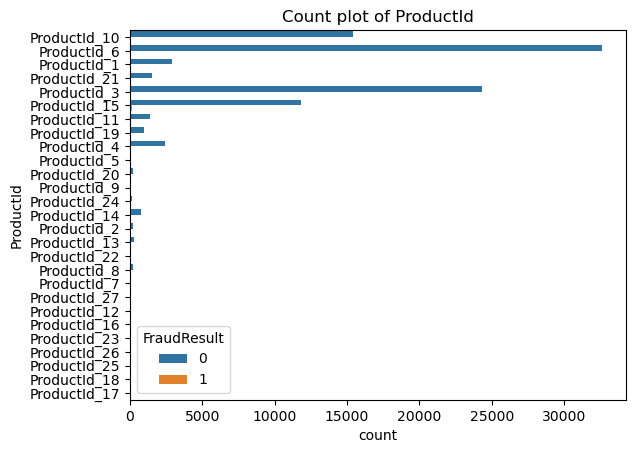

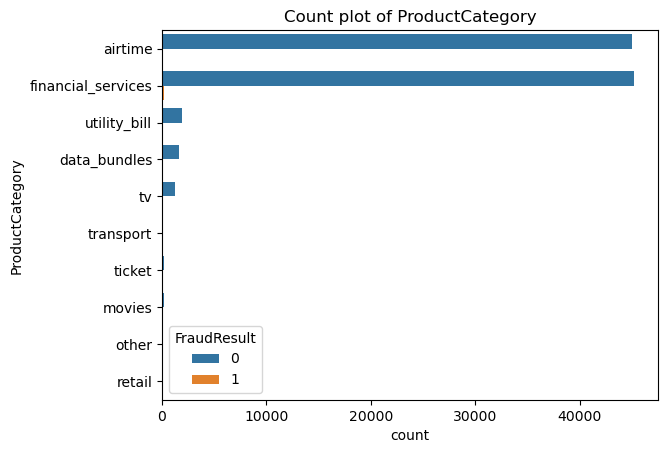

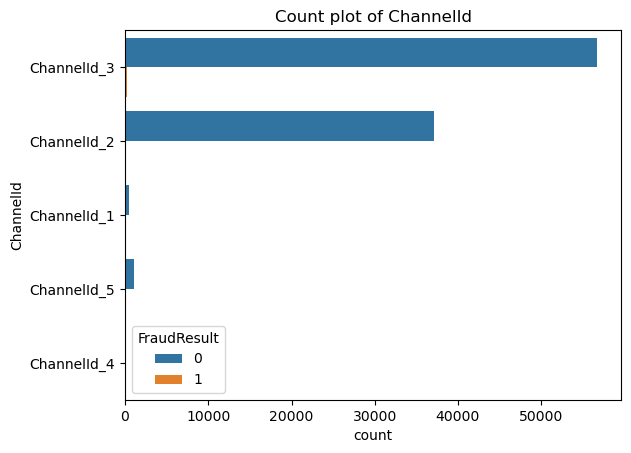

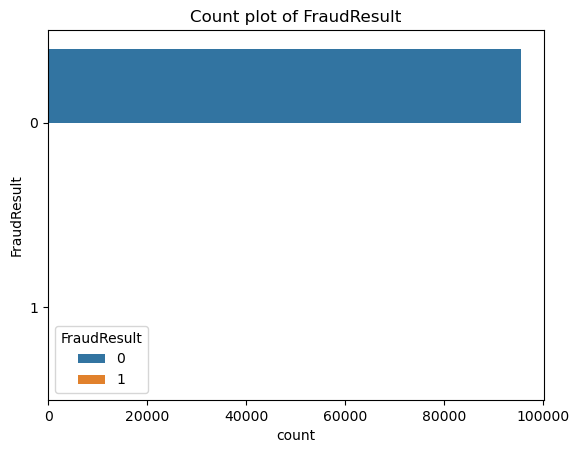

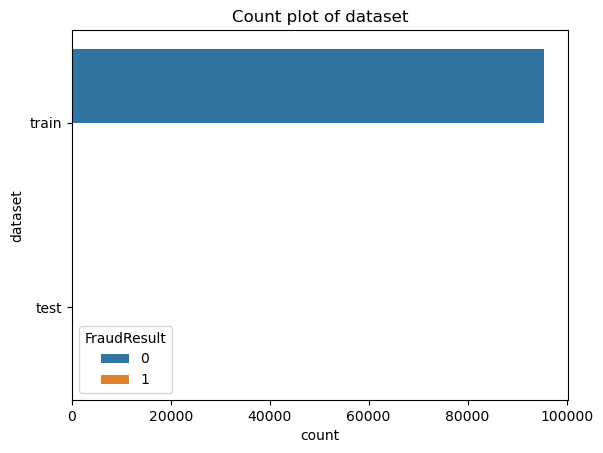

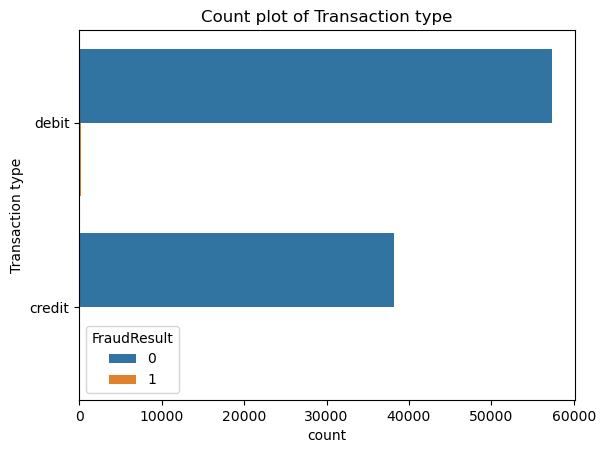

In [37]:
## Let's visualize the categories in the categorical columns and split by the label - fraud Result

for col in cat_columns:
    sb.countplot(y=col, data=combined_df, hue='FraudResult')
    plt.title(f'Count plot of {col}')
    plt.show()

In [38]:
## We need to select a subset of our train data as transactions that are not fraudulent are far more than those that are. 

combined_df[combined_df['FraudResult'] == 0]

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,dataset,Transaction type
0,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2,0,train,debit
1,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2,0,train,credit
2,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2,0,train,debit
3,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2,0,train,debit
4,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2,0,train,credit
...,...,...,...,...,...,...,...,...,...,...
95657,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2,0,train,credit
95658,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2,0,train,debit
95659,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2,0,train,credit
95660,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2,0,train,debit


In [39]:
combined_df[combined_df['FraudResult'] == 1]

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,dataset,Transaction type
131,ProviderId_3,ProductId_15,financial_services,ChannelId_3,700000.0,700000,0,1,train,debit
146,ProviderId_5,ProductId_9,financial_services,ChannelId_1,725000.0,725000,2,1,train,debit
155,ProviderId_3,ProductId_15,financial_services,ChannelId_3,700000.0,700000,0,1,train,debit
2376,ProviderId_1,ProductId_15,financial_services,ChannelId_3,700000.0,700000,0,1,train,debit
2452,ProviderId_3,ProductId_15,financial_services,ChannelId_3,700000.0,700000,0,1,train,debit
...,...,...,...,...,...,...,...,...,...,...
94805,ProviderId_3,ProductId_15,financial_services,ChannelId_3,2000000.0,2000000,2,1,train,debit
95108,ProviderId_6,ProductId_3,airtime,ChannelId_3,500000.0,500000,2,1,train,debit
95262,ProviderId_3,ProductId_15,financial_services,ChannelId_3,500000.0,500000,2,1,train,debit
95264,ProviderId_3,ProductId_15,financial_services,ChannelId_3,500000.0,500000,2,1,train,debit


In [40]:
# create a copy of combined_df so we can have our transformed data if something goes wrong

combined_df_copy = combined_df.copy()

In [41]:
combined_df[combined_df['FraudResult'].isnull()]

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,dataset,Transaction type
95662,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,4,None,test,debit
95663,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2,None,test,debit
95664,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2,None,test,credit
95665,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,4,None,test,debit
95666,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2,None,test,credit
...,...,...,...,...,...,...,...,...,...,...
140676,ProviderId_4,ProductId_6,financial_services,ChannelId_3,-5000.0,5000,2,None,test,credit
140677,ProviderId_3,ProductId_10,airtime,ChannelId_3,10000.0,10000,1,None,test,debit
140678,ProviderId_3,ProductId_10,airtime,ChannelId_3,10000.0,10000,1,None,test,debit
140679,ProviderId_4,ProductId_6,financial_services,ChannelId_3,-5000.0,5000,2,None,test,credit


In [42]:
combined_df[combined_df['FraudResult'] == 0].sample(200)

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,dataset,Transaction type
63665,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-496.0,496,2,0,train,credit
91340,ProviderId_6,ProductId_3,airtime,ChannelId_3,1000.0,1000,2,0,train,debit
80264,ProviderId_5,ProductId_15,financial_services,ChannelId_3,10000.0,10000,2,0,train,debit
77868,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2,0,train,credit
75045,ProviderId_6,ProductId_10,airtime,ChannelId_3,600.0,600,2,0,train,debit
...,...,...,...,...,...,...,...,...,...,...
95456,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2,0,train,credit
80428,ProviderId_6,ProductId_21,utility_bill,ChannelId_3,8800.0,9964,2,0,train,debit
31379,ProviderId_5,ProductId_15,financial_services,ChannelId_3,1500.0,1500,2,0,train,debit
64136,ProviderId_6,ProductId_10,airtime,ChannelId_3,3800.0,3800,2,0,train,debit


In [43]:
# combine a sample of the majority class with the rest of the data

combined_sampled_df = pd.concat([combined_df[combined_df['FraudResult'] == 0].sample(200), combined_df[combined_df['FraudResult'].isnull()], combined_df[combined_df['FraudResult'] == 1]], ignore_index=True)

In [44]:
combined_sampled_df

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,dataset,Transaction type
0,ProviderId_6,ProductId_10,airtime,ChannelId_3,3000.0,3000,2,0,train,debit
1,ProviderId_1,ProductId_3,airtime,ChannelId_3,10000.0,10000,4,0,train,debit
2,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2,0,train,credit
3,ProviderId_5,ProductId_10,airtime,ChannelId_3,10000.0,10000,4,0,train,debit
4,ProviderId_6,ProductId_21,utility_bill,ChannelId_1,800.0,1424,2,0,train,debit
...,...,...,...,...,...,...,...,...,...,...
45407,ProviderId_3,ProductId_15,financial_services,ChannelId_3,2000000.0,2000000,2,1,train,debit
45408,ProviderId_6,ProductId_3,airtime,ChannelId_3,500000.0,500000,2,1,train,debit
45409,ProviderId_3,ProductId_15,financial_services,ChannelId_3,500000.0,500000,2,1,train,debit
45410,ProviderId_3,ProductId_15,financial_services,ChannelId_3,500000.0,500000,2,1,train,debit


In [45]:
combined_sampled_df['dataset'].value_counts()

dataset
test     45019
train      393
Name: count, dtype: int64

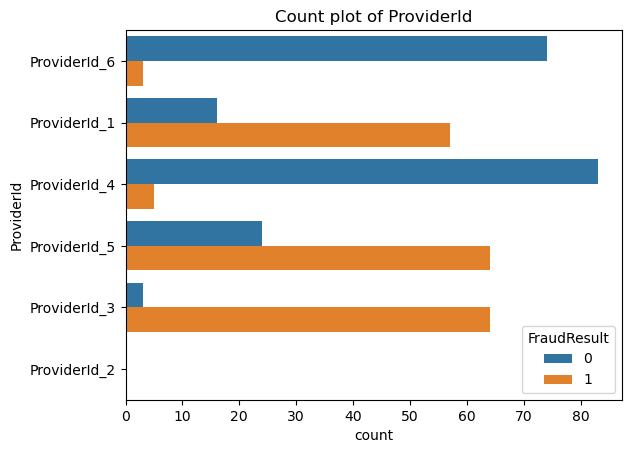

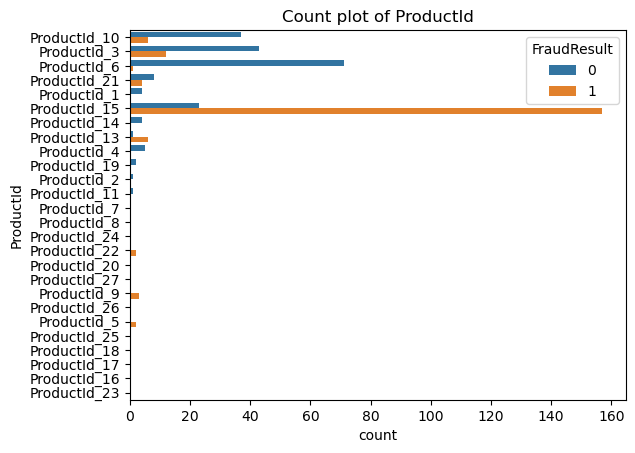

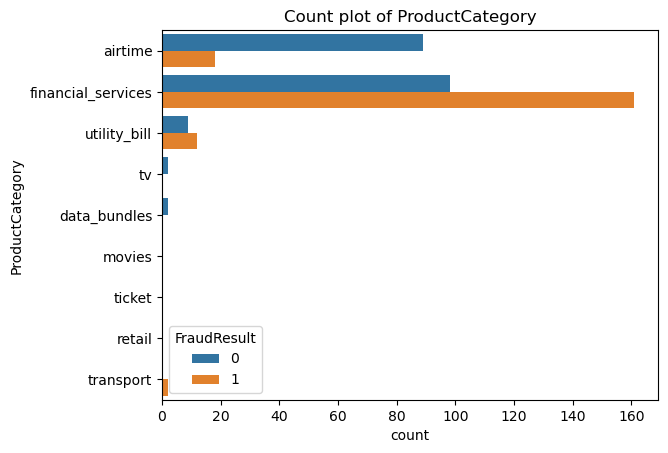

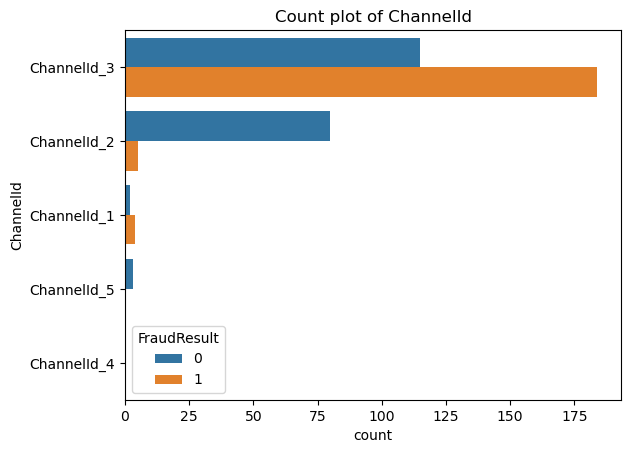

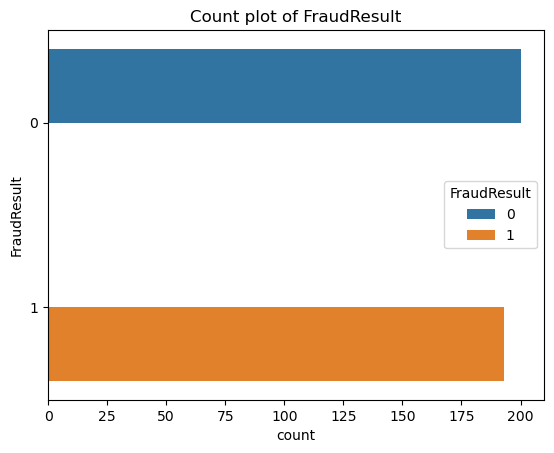

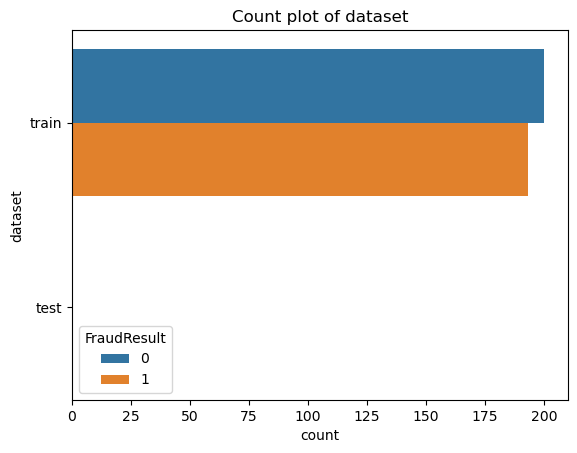

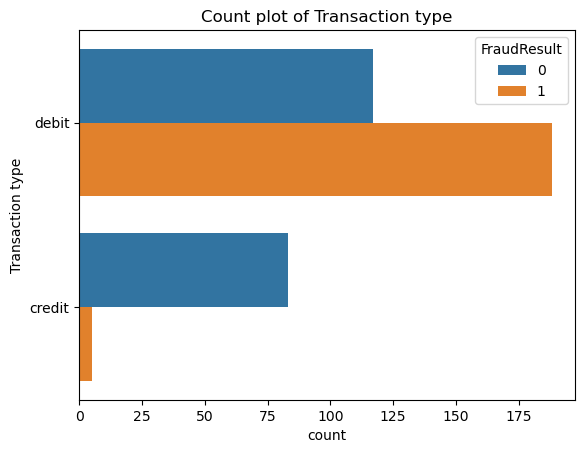

In [46]:
for col in cat_columns:
    sb.countplot(y=col, data=combined_sampled_df, hue='FraudResult')
    plt.title(f'Count plot of {col}')
    plt.show()

Provider and Channel show characteristics that they may be good predictors of fraudulent transactions

In [47]:
num_columns = [i for i in combined_sampled_df.select_dtypes(include=['int64', 'float64']).columns]
combined_sampled_df[num_columns].corr()

,Amount,Value,PricingStrategy
Amount,1.000000,0.972077,-0.061833
Value,0.972077,1.000000,-0.034312
PricingStrategy,-0.061833,-0.034312,1.000000


There's a high correlation between amount and value. We may need to drop one of them. 

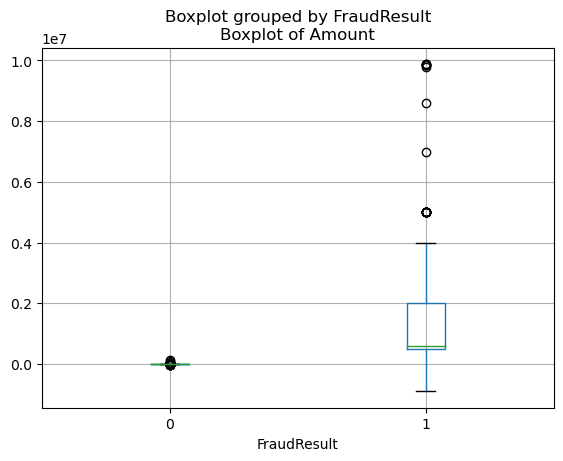

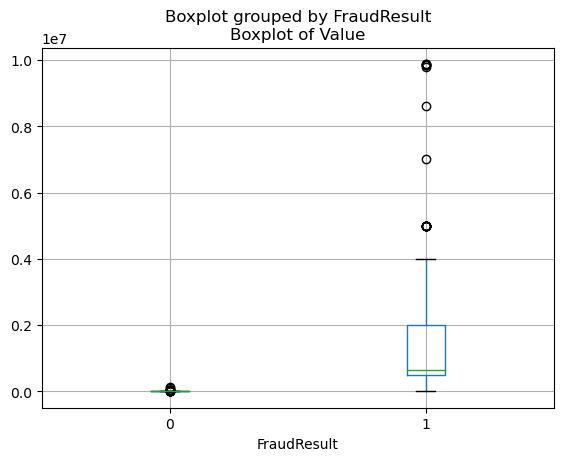

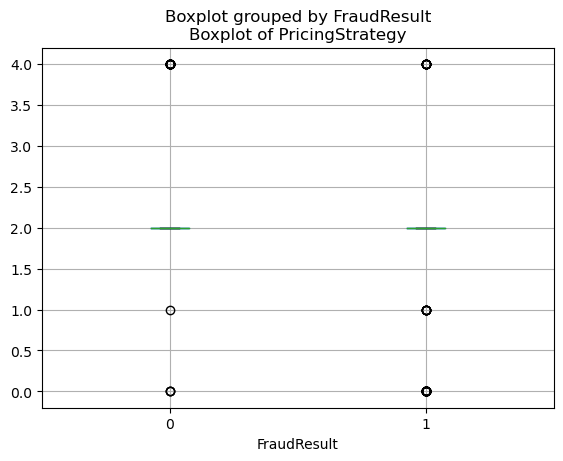

In [48]:
for col in num_columns:
    combined_sampled_df.boxplot(column=col, by='FraudResult')
    plt.title(f'Boxplot of {col}')
    plt.show()

In [49]:
combined_sampled_df.head()

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,dataset,Transaction type
0,ProviderId_6,ProductId_10,airtime,ChannelId_3,3000.0,3000,2,0,train,debit
1,ProviderId_1,ProductId_3,airtime,ChannelId_3,10000.0,10000,4,0,train,debit
2,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2,0,train,credit
3,ProviderId_5,ProductId_10,airtime,ChannelId_3,10000.0,10000,4,0,train,debit
4,ProviderId_6,ProductId_21,utility_bill,ChannelId_1,800.0,1424,2,0,train,debit


In [50]:
## We'd drop value since it's an absolute value

combined_sampled_df.drop('Value', axis=1, inplace=True)

In [51]:
combined_sampled_df.head()

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,PricingStrategy,FraudResult,dataset,Transaction type
0,ProviderId_6,ProductId_10,airtime,ChannelId_3,3000.0,2,0,train,debit
1,ProviderId_1,ProductId_3,airtime,ChannelId_3,10000.0,4,0,train,debit
2,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,2,0,train,credit
3,ProviderId_5,ProductId_10,airtime,ChannelId_3,10000.0,4,0,train,debit
4,ProviderId_6,ProductId_21,utility_bill,ChannelId_1,800.0,2,0,train,debit


In [52]:
## Encoding categorical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

combined_sampled_df['ProviderId'] = label_encoder.fit_transform(combined_sampled_df['ProviderId'])
combined_sampled_df['ProductId'] = label_encoder.fit_transform(combined_sampled_df['ProductId'])
combined_sampled_df['ProductCategory'] = label_encoder.fit_transform(combined_sampled_df['ProductCategory'])
combined_sampled_df['ChannelId'] = label_encoder.fit_transform(combined_sampled_df['ChannelId'])


In [53]:
combined_sampled_df.head()

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,PricingStrategy,FraudResult,dataset,Transaction type
0,5,1,0,2,3000.0,2,0,train,debit
1,0,19,0,2,10000.0,4,0,train,debit
2,3,22,2,1,-1000.0,2,0,train,credit
3,4,1,0,2,10000.0,4,0,train,debit
4,5,12,8,0,800.0,2,0,train,debit


In [54]:
train_sampled_df = combined_sampled_df[combined_sampled_df['dataset'] == 'train'].drop(columns=['dataset'])
test_df = combined_sampled_df[combined_sampled_df['dataset'] == 'test'].drop(columns=['dataset', 'FraudResult'])

In [55]:
train_sampled_df

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,PricingStrategy,FraudResult,Transaction type
0,5,1,0,2,3000.0,2,0,debit
1,0,19,0,2,10000.0,4,0,debit
2,3,22,2,1,-1000.0,2,0,credit
3,4,1,0,2,10000.0,4,0,debit
4,5,12,8,0,800.0,2,0,debit
...,...,...,...,...,...,...,...,...
45407,2,5,2,2,2000000.0,2,1,debit
45408,5,19,0,2,500000.0,2,1,debit
45409,2,5,2,2,500000.0,2,1,debit
45410,2,5,2,2,500000.0,2,1,debit


In [56]:
test_df 

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,PricingStrategy,Transaction type
200,4,19,0,2,1000.0,4,debit
201,4,5,2,2,2000.0,2,debit
202,3,22,2,1,-50.0,2,credit
203,4,1,0,2,3000.0,4,debit
204,3,22,2,1,-60.0,2,credit
...,...,...,...,...,...,...,...
45214,3,22,2,2,-5000.0,2,credit
45215,2,1,0,2,10000.0,1,debit
45216,2,1,0,2,10000.0,1,debit
45217,3,22,2,2,-5000.0,2,credit


In [57]:
 train_sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393 entries, 0 to 45411
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ProviderId        393 non-null    int32  
 1   ProductId         393 non-null    int32  
 2   ProductCategory   393 non-null    int32  
 3   ChannelId         393 non-null    int32  
 4   Amount            393 non-null    float64
 5   PricingStrategy   393 non-null    int64  
 6   FraudResult       393 non-null    object 
 7   Transaction type  393 non-null    object 
dtypes: float64(1), int32(4), int64(1), object(2)
memory usage: 21.5+ KB


In [58]:
 train_sampled_df['FraudResult'] =  train_sampled_df['FraudResult'].astype('int64')

In [59]:
## split into features and label

X_train = train_sampled_df[['ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'PricingStrategy']]
y_train = train_sampled_df['FraudResult']

In [60]:
X_train

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,PricingStrategy
0,5,1,0,2,3000.0,2
1,0,19,0,2,10000.0,4
2,3,22,2,1,-1000.0,2
3,4,1,0,2,10000.0,4
4,5,12,8,0,800.0,2
...,...,...,...,...,...,...
45407,2,5,2,2,2000000.0,2
45408,5,19,0,2,500000.0,2
45409,2,5,2,2,500000.0,2
45410,2,5,2,2,500000.0,2


In [61]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
45407    1
45408    1
45409    1
45410    1
45411    1
Name: FraudResult, Length: 393, dtype: int64

##### Model Building

##### Logistic regression model

In [62]:
from sklearn.linear_model import LogisticRegression

logist_model = LogisticRegression().fit(X_train, y_train)

In [63]:
X_test = test_df[['ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'PricingStrategy']]

In [64]:
X_test

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,PricingStrategy
200,4,19,0,2,1000.0,4
201,4,5,2,2,2000.0,2
202,3,22,2,1,-50.0,2
203,4,1,0,2,3000.0,4
204,3,22,2,1,-60.0,2
...,...,...,...,...,...,...
45214,3,22,2,2,-5000.0,2
45215,2,1,0,2,10000.0,1
45216,2,1,0,2,10000.0,1
45217,3,22,2,2,-5000.0,2


In [65]:
combined_df.head()

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,dataset,Transaction type
0,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2,0,train,debit
1,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2,0,train,credit
2,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2,0,train,debit
3,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2,0,train,debit
4,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2,0,train,credit


In [66]:
train_test_df = combined_df[combined_df['dataset'] == 'train'].drop(columns=['dataset'])

In [67]:
train_test_df['ProviderId'] = label_encoder.fit_transform(train_test_df['ProviderId'])
train_test_df['ProductId'] = label_encoder.fit_transform(train_test_df['ProductId'])
train_test_df['ProductCategory'] = label_encoder.fit_transform(train_test_df['ProductCategory'])
train_test_df['ChannelId'] = label_encoder.fit_transform(train_test_df['ChannelId'])

In [68]:
train_test_df.head()

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,Transaction type
0,5,1,0,2,1000.0,1000,2,0,debit
1,3,19,2,1,-20.0,20,2,0,credit
2,5,0,0,2,500.0,500,2,0,debit
3,0,11,8,2,20000.0,21800,2,0,debit
4,3,19,2,1,-644.0,644,2,0,credit


In [69]:
train_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95662 entries, 0 to 95661
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ProviderId        95662 non-null  int32  
 1   ProductId         95662 non-null  int32  
 2   ProductCategory   95662 non-null  int32  
 3   ChannelId         95662 non-null  int32  
 4   Amount            95662 non-null  float64
 5   Value             95662 non-null  int64  
 6   PricingStrategy   95662 non-null  int64  
 7   FraudResult       95662 non-null  object 
 8   Transaction type  95662 non-null  object 
dtypes: float64(1), int32(4), int64(2), object(2)
memory usage: 5.8+ MB


In [70]:
train_test_df['FraudResult'] = train_test_df['FraudResult'].astype('int64')

In [71]:
X_val = train_test_df[['ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'PricingStrategy']]
y_val = train_test_df['FraudResult']

In [72]:
X_val

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,PricingStrategy
0,5,1,0,2,1000.0,2
1,3,19,2,1,-20.0,2
2,5,0,0,2,500.0,2
3,0,11,8,2,20000.0,2
4,3,19,2,1,-644.0,2
...,...,...,...,...,...,...
95657,3,19,2,1,-1000.0,2
95658,5,1,0,2,1000.0,2
95659,3,19,2,1,-20.0,2
95660,5,8,7,2,3000.0,2


In [73]:
y_val

0        0
1        0
2        0
3        0
4        0
        ..
95657    0
95658    0
95659    0
95660    0
95661    0
Name: FraudResult, Length: 95662, dtype: int64

In [74]:
y_val.value_counts()

FraudResult
0    95469
1      193
Name: count, dtype: int64

In [75]:
from sklearn.metrics import accuracy_score

predictions = logist_model.predict(X_val)
accuracy = accuracy_score(y_val, predictions)

In [76]:
print(f'accuracy score for Logistic reg model is {accuracy}')

accuracy score for Logistic reg model is 0.99543183291171


In [77]:
from sklearn.metrics import classification_report

print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     95469
           1       0.29      0.91      0.44       193

    accuracy                           1.00     95662
   macro avg       0.65      0.95      0.72     95662
weighted avg       1.00      1.00      1.00     95662



<Axes: xlabel='prediction', ylabel='Actual'>

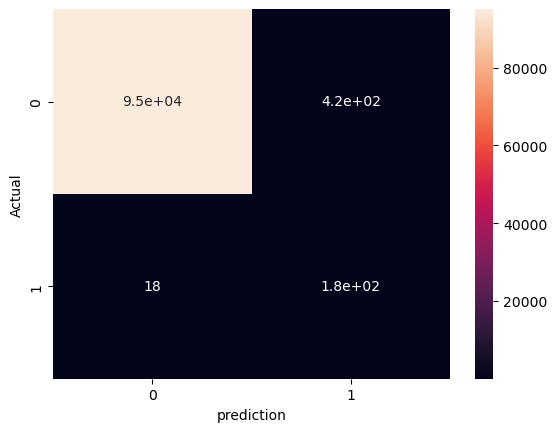

In [78]:
sb.heatmap(pd.crosstab(y_val, predictions, rownames=['Actual'], colnames=['prediction']), annot=True)

- The logistic model is misclassifying a lot of non-fradulent transactions as fradulent leading to low precision.
- The logistic model is able to identify fradulent transactions well to some degree.  

##### KNN Model

In [79]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)

model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [80]:
predictions = model_knn.predict(X_val)
accuracy = accuracy_score(y_val, predictions)  # computational cost is expensive.

In [81]:
print(f'accuracy score for KNN model is {accuracy}')

accuracy score for KNN model is 0.9836298634776609


In [82]:
from sklearn.metrics import classification_report

print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     95469
           1       0.11      0.98      0.20       193

    accuracy                           0.98     95662
   macro avg       0.55      0.98      0.59     95662
weighted avg       1.00      0.98      0.99     95662



##### Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [84]:
predictions = rf_model.predict(X_val)
accuracy = accuracy_score(y_val, predictions) 

In [85]:
print(f'accuracy score for KNN model is {accuracy}')

accuracy score for KNN model is 0.9899542137944011


In [86]:
from sklearn.metrics import classification_report

print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     95469
           1       0.17      0.98      0.28       193

    accuracy                           0.99     95662
   macro avg       0.58      0.99      0.64     95662
weighted avg       1.00      0.99      0.99     95662



#### Model Improvement

So far the metrics follow the same trend. Let's go back to reduce the number of features and see if this helps our model performance

In [87]:
X_train

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,PricingStrategy
0,5,1,0,2,3000.0,2
1,0,19,0,2,10000.0,4
2,3,22,2,1,-1000.0,2
3,4,1,0,2,10000.0,4
4,5,12,8,0,800.0,2
...,...,...,...,...,...,...
45407,2,5,2,2,2000000.0,2
45408,5,19,0,2,500000.0,2
45409,2,5,2,2,500000.0,2
45410,2,5,2,2,500000.0,2


In [88]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
45407    1
45408    1
45409    1
45410    1
45411    1
Name: FraudResult, Length: 393, dtype: int64

In [89]:
# let's use random forest for feature selection 
import numpy as np 

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1] 

In [90]:
indices

array([4, 0, 1, 2, 3, 5], dtype=int64)

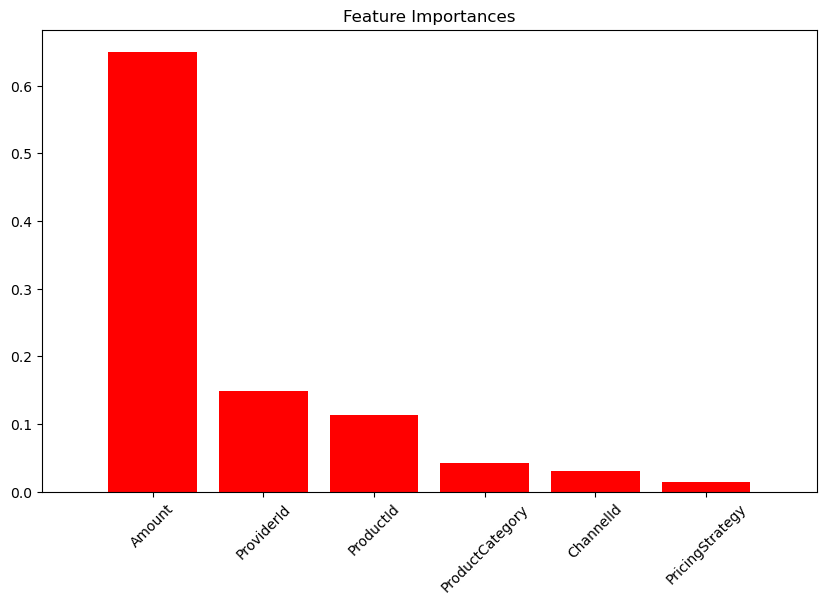

In [91]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [92]:
## select the top 3 features

X_train_3 = X_train[['Amount', 'ProviderId', 'ProductId']]

In [93]:
X_train_3

,Amount,ProviderId,ProductId
0,3000.0,5,1
1,10000.0,0,19
2,-1000.0,3,22
3,10000.0,4,1
4,800.0,5,12
...,...,...,...
45407,2000000.0,2,5
45408,500000.0,5,19
45409,500000.0,2,5
45410,500000.0,2,5


In [94]:
## Logistic reg model

reg = 0.01

logist_model_3 = LogisticRegression().fit(X_train_3, y_train)

In [95]:
X_val_3 = X_val[['Amount', 'ProviderId', 'ProductId']]
predictions = logist_model_3.predict(X_val_3)
accuracy = accuracy_score(y_val, predictions) 

In [96]:
print(f'accuracy score for logist_model_3 model is {accuracy}')

accuracy score for logist_model_3 model is 0.9934247663649098


In [97]:
from sklearn.metrics import classification_report

print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     95469
           1       0.22      0.91      0.36       193

    accuracy                           0.99     95662
   macro avg       0.61      0.95      0.68     95662
weighted avg       1.00      0.99      1.00     95662



##### Fraud Detection Challange Check

In [163]:
# The best model so far in terms of f1 score is the logist_model 

X_test

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,PricingStrategy
200,4,19,0,2,1000.0,4
201,4,5,2,2,2000.0,2
202,3,22,2,1,-50.0,2
203,4,1,0,2,3000.0,4
204,3,22,2,1,-60.0,2
...,...,...,...,...,...,...
45214,3,22,2,2,-5000.0,2
45215,2,1,0,2,10000.0,1
45216,2,1,0,2,10000.0,1
45217,3,22,2,2,-5000.0,2


In [164]:
test_df

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,PricingStrategy,Transaction type
200,4,19,0,2,1000.0,4,debit
201,4,5,2,2,2000.0,2,debit
202,3,22,2,1,-50.0,2,credit
203,4,1,0,2,3000.0,4,debit
204,3,22,2,1,-60.0,2,credit
...,...,...,...,...,...,...,...
45214,3,22,2,2,-5000.0,2,credit
45215,2,1,0,2,10000.0,1,debit
45216,2,1,0,2,10000.0,1,debit
45217,3,22,2,2,-5000.0,2,credit


In [165]:
predictions_x_test = logist_model.predict(X_test)

In [169]:
predictions_x_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [171]:
test_df_copy['TransactionId'].values

array(['TransactionId_50600', 'TransactionId_95109',
       'TransactionId_47357', ..., 'TransactionId_102920',
       'TransactionId_128439', 'TransactionId_45927'], dtype=object)

In [172]:
submission_df = pd.DataFrame({
    'TransactionId': test_df_copy['TransactionId'].values,
    'FraudResult' : predictions_x_test
})

In [173]:
submission_df.head()

,TransactionId,FraudResult
0,TransactionId_50600,0
1,TransactionId_95109,0
2,TransactionId_47357,0
3,TransactionId_28185,0
4,TransactionId_22140,0


In [174]:
submission_df['FraudResult'].value_counts()

FraudResult
0    44674
1      345
Name: count, dtype: int64

In [177]:
submission_df.reset_index(drop=True, inplace=True)

In [178]:
submission_df.to_csv('Submission_1.csv')

In [257]:
## submit the logist_1000 model

predictions_x_test_1000 = logist_model_10000.predict(X_test)

In [258]:
submission_df_1000 = pd.DataFrame({
    'TransactionId': test_df_copy['TransactionId'].values,
    'FraudResult' :predictions_x_test_1000
})

In [259]:
submission_df_1000.to_csv('Submission_2.csv')

In [168]:
 best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [169]:
predictions_x_gboost_model =  best_model.predict(X_test)

In [170]:
submission_df_xgboost = pd.DataFrame({
    'TransactionId': test_df_copy['TransactionId'].values,
    'FraudResult' : predictions_x_gboost_model
})

In [171]:
submission_df_xgboost.to_csv('Submission_3.csv')

#### Areas for improvement

- There's a possiblity we are too few samples for training. Let's use all the data and allow the algorithm manage data imbalance.
- scale amount to remove bias.

In [98]:
X_train

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,PricingStrategy
0,5,1,0,2,3000.0,2
1,0,19,0,2,10000.0,4
2,3,22,2,1,-1000.0,2
3,4,1,0,2,10000.0,4
4,5,12,8,0,800.0,2
...,...,...,...,...,...,...
45407,2,5,2,2,2000000.0,2
45408,5,19,0,2,500000.0,2
45409,2,5,2,2,500000.0,2
45410,2,5,2,2,500000.0,2


In [99]:
from sklearn.preprocessing import MinMaxScaler

X_train_scaled = X_train.copy()

X_train_scaled[['Amount']] = MinMaxScaler().fit_transform(X_train_scaled[['Amount']])

In [100]:
X_train_scaled

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,PricingStrategy
0,5,1,0,2,0.083766,2
1,0,19,0,2,0.084416,4
2,3,22,2,1,0.083395,2
3,4,1,0,2,0.084416,4
4,5,12,8,0,0.083562,2
...,...,...,...,...,...,...
45407,2,5,2,2,0.269017,2
45408,5,19,0,2,0.129870,2
45409,2,5,2,2,0.129870,2
45410,2,5,2,2,0.129870,2


In [101]:
rf_model_scaled = RandomForestClassifier()

rf_model_scaled.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [102]:
X_val_scaled = X_val.copy()

X_val_scaled[['Amount']] = MinMaxScaler().fit_transform(X_val_scaled[['Amount']])

In [103]:
predictions = rf_model_scaled.predict(X_val_scaled)
accuracy = accuracy_score(y_val, predictions)

In [104]:
print(f'accuracy score for rf_model_scaled model is {accuracy}')

accuracy score for rf_model_scaled model is 0.8773807781564258


In [105]:
from sklearn.metrics import classification_report

print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93     95469
           1       0.02      0.99      0.03       193

    accuracy                           0.88     95662
   macro avg       0.51      0.93      0.48     95662
weighted avg       1.00      0.88      0.93     95662



In [106]:
logist_model_scaled = LogisticRegression().fit(X_train_scaled, y_train)

In [107]:
predictions = logist_model_scaled.predict(X_val_scaled)
accuracy = accuracy_score(y_val, predictions)

In [108]:
print(f'accuracy score for logist_model_scaled model is {accuracy}')

accuracy score for logist_model_scaled model is 0.917344400075265


In [109]:
from sklearn.metrics import classification_report

print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     95469
           1       0.02      0.84      0.04       193

    accuracy                           0.92     95662
   macro avg       0.51      0.88      0.50     95662
weighted avg       1.00      0.92      0.95     95662



scaling the amount feature made the model worse

In [110]:
### By scaling just amout, we might have run into issues. Let's scale the rest of the columns and see what we get

X_train_all_scaled = MinMaxScaler().fit_transform(X_train)

In [111]:
X_train_all_scaled

array([[1.        , 0.04      , 0.        , 0.5       , 0.08376623,
        0.5       ],
       [0.        , 0.76      , 0.        , 0.5       , 0.08441558,
        1.        ],
       [0.6       , 0.88      , 0.25      , 0.25      , 0.08339518,
        0.5       ],
       ...,
       [0.4       , 0.2       , 0.25      , 0.5       , 0.12987013,
        0.5       ],
       [0.4       , 0.2       , 0.25      , 0.5       , 0.12987013,
        0.5       ],
       [0.4       , 0.2       , 0.25      , 0.5       , 0.12987013,
        0.5       ]])

In [112]:
X_train_all_scaled = pd.DataFrame(X_train_all_scaled, columns=X_train.columns)

In [113]:
X_train_all_scaled

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,PricingStrategy
0,1.0,0.04,0.00,0.50,0.083766,0.5
1,0.0,0.76,0.00,0.50,0.084416,1.0
2,0.6,0.88,0.25,0.25,0.083395,0.5
3,0.8,0.04,0.00,0.50,0.084416,1.0
4,1.0,0.48,1.00,0.00,0.083562,0.5
...,...,...,...,...,...,...
388,0.4,0.20,0.25,0.50,0.269017,0.5
389,1.0,0.76,0.00,0.50,0.129870,0.5
390,0.4,0.20,0.25,0.50,0.129870,0.5
391,0.4,0.20,0.25,0.50,0.129870,0.5


In [114]:
## logistic reg model

logist_model_all_scaled = LogisticRegression().fit(X_train_all_scaled, y_train)

In [115]:
X_val_all_scaled = MinMaxScaler().fit_transform(X_val)

In [116]:
X_val_all_scaled = pd.DataFrame(X_val_all_scaled, columns=X_val.columns)

In [117]:
predictions = logist_model_all_scaled.predict(X_val_all_scaled)
accuracy = accuracy_score(y_val, predictions)

In [118]:
print(f'accuracy score for logist_model_all_scaled is {accuracy}')

accuracy score for logist_model_all_scaled is 0.9134557086408396


In [119]:
from sklearn.metrics import classification_report

print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     95469
           1       0.02      0.91      0.04       193

    accuracy                           0.91     95662
   macro avg       0.51      0.91      0.50     95662
weighted avg       1.00      0.91      0.95     95662



In [207]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/a2/48/d5da8591891327b0faf08179d420fba3893c6134bdd449497c5329e4cb01/xgboost-2.1.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 145.2 kB/s eta 0:14:20
   ---------------------------------------- 0.0/124.9 MB 145.2 kB/s eta 0:14:20
   ---------------------------------------- 0.1/124.9 MB 217.9 kB/s eta 0:09:33
   ---------------------------------------- 0.1/124.9 MB 231.0 kB/s eta 0:09:01
   ---------------------------------------- 0.1/124.9 MB 280.1 kB/s eta 0:07:26
   ---------------------------------------- 0.1/124.9 MB 280.1 kB/s eta 0:07:26
   ----------------------------

it's obvious scaling isn't the best approach

Before we train on more data, let's use boosting algorithms and see how they perform

In [120]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(eval_metric='mlogloss')

In [121]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [122]:
predictions = xgb_clf.predict(X_val)
accuracy = accuracy_score(y_val, predictions) 

In [123]:
print(f'accuracy score for xgb_clf model is {accuracy}')

accuracy score for xgb_clf model is 0.9719637891743849


In [124]:
from sklearn.metrics import classification_report

print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     95469
           1       0.07      0.99      0.12       193

    accuracy                           0.97     95662
   macro avg       0.53      0.98      0.56     95662
weighted avg       1.00      0.97      0.98     95662



In [125]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)

In [126]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [127]:
predictions = ada_clf.predict(X_val)
accuracy = accuracy_score(y_val, predictions) 

In [128]:
print(f'accuracy score for ada_clf model is {accuracy}')

accuracy score for ada_clf model is 0.9836298634776609


In [129]:
from sklearn.metrics import classification_report

print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     95469
           1       0.11      0.99      0.20       193

    accuracy                           0.98     95662
   macro avg       0.55      0.99      0.59     95662
weighted avg       1.00      0.98      0.99     95662



Something else we can try is to tune the hyperparameters for these models. We'd use grid search and see what we get

In [130]:
## Let's use a simple algorithm - Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [131]:
predictions = dt_clf.predict(X_val)
accuracy = accuracy_score(y_val, predictions) 

In [132]:
print(f'accuracy score for dt_clf model is {accuracy}')

accuracy score for dt_clf model is 0.9850933495013694


In [133]:
from sklearn.metrics import classification_report

print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     95469
           1       0.12      0.99      0.21       193

    accuracy                           0.99     95662
   macro avg       0.56      0.99      0.60     95662
weighted avg       1.00      0.99      0.99     95662



##### Train on more examples

In [134]:
combined_sampled_5000_df = pd.concat([combined_df[combined_df['FraudResult'] == 0].sample(5000), combined_df[combined_df['FraudResult'].isnull()], combined_df[combined_df['FraudResult'] == 1]], ignore_index=True)

In [135]:
combined_sampled_5000_df.head()

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,dataset,Transaction type
0,ProviderId_6,ProductId_3,airtime,ChannelId_3,500.0,500,2,0,train,debit
1,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2,0,train,credit
2,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,4,0,train,debit
3,ProviderId_1,ProductId_15,financial_services,ChannelId_3,40000.0,40000,2,0,train,debit
4,ProviderId_3,ProductId_15,financial_services,ChannelId_3,500.0,500,2,0,train,debit


In [136]:
combined_sampled_5000_df['FraudResult'].value_counts()

FraudResult
0    5000
1     193
Name: count, dtype: int64

In [137]:
## define a function that takes the sampled data and applies preprocessing steps

def preprocess_data(sampled_df):
    sampled_df.drop('Value', axis=1, inplace=True)
    sampled_df['ProviderId'] = label_encoder.fit_transform(sampled_df['ProviderId'])
    sampled_df['ProductId'] = label_encoder.fit_transform(sampled_df['ProductId'])
    sampled_df['ProductCategory'] = label_encoder.fit_transform(sampled_df['ProductCategory'])
    sampled_df['ChannelId'] = label_encoder.fit_transform(sampled_df['ChannelId'])
    train_sampled_df = sampled_df[sampled_df['dataset'] == 'train'].drop(columns=['dataset'])
    test_df = sampled_df[sampled_df['dataset'] == 'test'].drop(columns=['dataset', 'FraudResult'])
    train_sampled_df['FraudResult'] =  train_sampled_df['FraudResult'].astype('int64')
    X_train = train_sampled_df[['ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'PricingStrategy']]
    y_train = train_sampled_df['FraudResult']
    return [X_train, y_train]

In [138]:
training_5000_data = preprocess_data(combined_sampled_5000_df)

In [139]:
X_train_5000 = training_5000_data[0]

In [140]:
y_train_5000 = training_5000_data[1]

In [141]:
logist_model_5000 = LogisticRegression().fit(X_train_5000, y_train_5000)

In [142]:
X_train_5000

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,PricingStrategy
0,5,19,0,2,500.0,2
1,3,22,2,1,-20.0,2
2,4,19,0,2,1000.0,4
3,0,5,2,2,40000.0,2
4,2,5,2,2,500.0,2
...,...,...,...,...,...,...
50207,2,5,2,2,2000000.0,2
50208,5,19,0,2,500000.0,2
50209,2,5,2,2,500000.0,2
50210,2,5,2,2,500000.0,2


In [143]:
X_val

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,PricingStrategy
0,5,1,0,2,1000.0,2
1,3,19,2,1,-20.0,2
2,5,0,0,2,500.0,2
3,0,11,8,2,20000.0,2
4,3,19,2,1,-644.0,2
...,...,...,...,...,...,...
95657,3,19,2,1,-1000.0,2
95658,5,1,0,2,1000.0,2
95659,3,19,2,1,-20.0,2
95660,5,8,7,2,3000.0,2


In [144]:
predictions = logist_model_5000.predict(X_val)
accuracy = accuracy_score(y_val, predictions) 

In [145]:
print(f'accuracy score for logist_model_5000 model is {accuracy}')

accuracy score for logist_model_5000 model is 0.998599234805879


In [146]:
from sklearn.metrics import classification_report

print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     95469
           1       0.61      0.84      0.71       193

    accuracy                           1.00     95662
   macro avg       0.81      0.92      0.85     95662
weighted avg       1.00      1.00      1.00     95662



This looks like a good model

<Axes: xlabel='prediction', ylabel='Actual'>

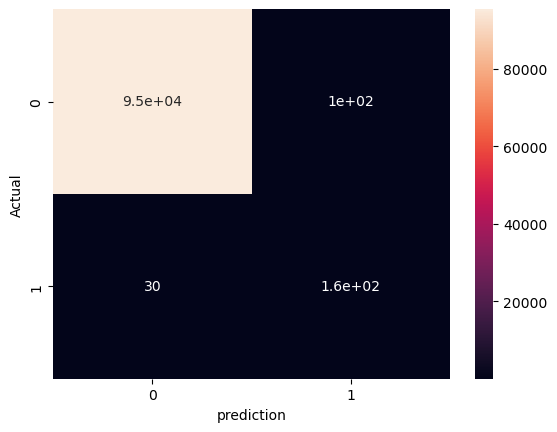

In [147]:
sb.heatmap(pd.crosstab(y_val, predictions, rownames=['Actual'], colnames=['prediction']), annot=True)

In [148]:
## random forest

rf_model_5000 = RandomForestClassifier().fit(X_train_5000, y_train_5000)

In [149]:
predictions = rf_model_5000.predict(X_val)
accuracy = accuracy_score(y_val, predictions) 

In [150]:
print(f'accuracy score for  rf_model_5000 model is {accuracy}')

accuracy score for  rf_model_5000 model is 0.9985260605046936


In [151]:
from sklearn.metrics import classification_report

print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     95469
           1       0.58      0.97      0.73       193

    accuracy                           1.00     95662
   macro avg       0.79      0.98      0.86     95662
weighted avg       1.00      1.00      1.00     95662



Let's use more training data

In [152]:
combined_sampled_10000_df = pd.concat([combined_df[combined_df['FraudResult'] == 0].sample(10000), combined_df[combined_df['FraudResult'].isnull()], combined_df[combined_df['FraudResult'] == 1]], ignore_index=True)

In [153]:
combined_sampled_10000_df['FraudResult'].value_counts()

FraudResult
0    10000
1      193
Name: count, dtype: int64

In [154]:
training_10000_data = preprocess_data(combined_sampled_10000_df)

In [155]:
X_train_10000 = training_10000_data[0]
y_train_10000 = training_10000_data[1]

In [156]:
logist_model_10000 = LogisticRegression().fit(X_train_10000, y_train_10000)

In [157]:
predictions = logist_model_10000.predict(X_val)
accuracy = accuracy_score(y_val, predictions) 

print(f'accuracy score for logist_model_10000 model is {accuracy}')

accuracy score for logist_model_10000 model is 0.9987978507662395


In [158]:
from sklearn.metrics import classification_report

print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     95469
           1       0.66      0.82      0.73       193

    accuracy                           1.00     95662
   macro avg       0.83      0.91      0.87     95662
weighted avg       1.00      1.00      1.00     95662



Let's use more training data

In [159]:
combined_sampled_50000_df = pd.concat([combined_df[combined_df['FraudResult'] == 0].sample(50000), combined_df[combined_df['FraudResult'].isnull()], combined_df[combined_df['FraudResult'] == 1]], ignore_index=True)

In [160]:
training_50000_data = preprocess_data(combined_sampled_50000_df)

In [161]:
X_train_50000 = training_50000_data[0]
y_train_50000 = training_50000_data[1]

In [162]:
logist_model_50000 = LogisticRegression().fit(X_train_50000, y_train_50000)

In [163]:
predictions = logist_model_50000.predict(X_val)
accuracy = accuracy_score(y_val, predictions) 

print(f'accuracy score for logist_model_10000 model is {accuracy}')

accuracy score for logist_model_10000 model is 0.9983797119023228


In [164]:
from sklearn.metrics import classification_report

print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     95469
           1       0.61      0.53      0.57       193

    accuracy                           1.00     95662
   macro avg       0.81      0.77      0.78     95662
weighted avg       1.00      1.00      1.00     95662



There's no improvement. We may now consider hyperparameter tuning using grid search 

##### Hyper parameter tuning

In [165]:
# Define the models and the parameters to be tuned
from sklearn.svm import SVC
import xgboost as xgb

models = {
    'RandomForest': RandomForestClassifier(random_state=42),
#     'SVM': SVC(),
#     'KNN': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=200),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

params = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
#     'SVM': {
#         'C': [0.1, 1, 10, 100],
#         'gamma': [1, 0.1, 0.01, 0.001],
#         'kernel': ['rbf', 'linear']
#     },
#     'KNN': {
#         'n_neighbors': [3, 5, 7, 9],
#         'weights': ['uniform', 'distance'],
#         'metric': ['euclidean', 'manhattan']
#     },
    'LogisticRegression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    },
      'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    }
}

In [166]:
from sklearn.model_selection import GridSearchCV

# Dictionary to store the best models
best_models = {}

for model_name in models:
    print(f"Running Grid Search for {model_name}...")
    grid_search = GridSearchCV(models[model_name], params[model_name], cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train_10000, y_train_10000)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best score for {model_name}: {grid_search.best_score_}\n")


Running Grid Search for RandomForest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best score for RandomForest: 0.997449297097184

Running Grid Search for LogisticRegression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for LogisticRegression: {'C': 0.1, 'solver': 'liblinear'}
Best score for LogisticRegression: 0.9962719607496796

Running Grid Search for XGBoost...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.8}
Best score for XGBoost: 0.9977435108610747



In [167]:
best_model_name = max(best_models, key=lambda k: best_models[k].score(X_val, y_val))
best_model = best_models[best_model_name]

print(f"Best model: {best_model_name}")
print("Test set accuracy:", accuracy_score(y_val, best_model.predict(X_val)))
print("Classification report:")
print(classification_report(y_val, best_model.predict(X_val)))


Best model: XGBoost
Test set accuracy: 0.9991428153289708
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     95469
           1       0.75      0.87      0.80       193

    accuracy                           1.00     95662
   macro avg       0.87      0.93      0.90     95662
weighted avg       1.00      1.00      1.00     95662



On applying this model to the test data, the f1 score is 0.52 indicating a case of overfitting

In [175]:
### use f1 score as the scorer
from sklearn.metrics import make_scorer, f1_score

scorer = make_scorer(f1_score, average='weighted')


best_models = {}

for model_name in models:
    print(f"Running Grid Search for {model_name}...")
    grid_search = GridSearchCV(models[model_name], params[model_name], cv=5, n_jobs=-1, scoring=scorer, verbose=1)
    grid_search.fit(X_train_10000, y_train_10000)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best score for {model_name}: {grid_search.best_score_}\n")

Running Grid Search for RandomForest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best score for RandomForest: 0.9973613768146166

Running Grid Search for LogisticRegression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for LogisticRegression: {'C': 0.1, 'solver': 'liblinear'}
Best score for LogisticRegression: 0.9959665514476042

Running Grid Search for XGBoost...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.8}
Best score for XGBoost: 0.9976971921240188



In [176]:
best_model_name_fl_score = max(best_models, key=lambda k: best_models[k].score(X_val, y_val))
best_model_fl_score = best_models[best_model_name]

print(f"Best model: {best_model_name}")
print("Test set accuracy:", accuracy_score(y_val,best_model_fl_score .predict(X_val)))
print("Classification report:")
print(classification_report(y_val, best_model.predict(X_val)))

Best model: XGBoost
Test set accuracy: 0.9991428153289708
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     95469
           1       0.75      0.87      0.80       193

    accuracy                           1.00     95662
   macro avg       0.87      0.93      0.90     95662
weighted avg       1.00      1.00      1.00     95662



##### Model persistence

In [172]:
import joblib

filename = 'fraud_detection_xgboost_model.joblib'
joblib.dump(best_model, filename)

['fraud_detection_xgboost_model.joblib']